# Линейные модели

### Начнем с линейной регрессии.

Это метод обучения с учителем, так как требует обучающих размеченных данных.
Его задача состоит в том, чтобы восстановить зависимость между пемеренными.

К примеру, с помощью линейной регрессии можно по возрасту, уровню заработной платы, трудовому стажу предсказывать его доход через несколько лет

#### Ок, теперь математическая запись

Объясняемая переменная $y$ зависит от объясняющих ее факторов линейно: $\large y = w_0 + \sum_{i=1}^m w_i x_i$. 

Обычно добавляют фиктивную размерность $x_0 = 1$ для каждого наблюдения, тогда можно записать свободный член $w_0$ под сумму: $\large y = \sum_{i=0}^m w_i x_i = \vec{w}^T \vec{x}$. 

Если записать все в матричном виде, получим следующую формулу: $\large \vec y = X \vec w + \epsilon$

где:
$X$ – матрица признаков;

$\vec y \in \mathbb{R}^n$ - целевая переменная (ее как раз и будем моделировать);

$w$ – вектор весов (параметры нашей модели, те данные, которые мы хотим получить после обучения);

$\epsilon$ – случайная переменная, соответствующая случайной ошибке модели;

#### Маленький матликбез

Вектор  в математике - это (в простейшем случае) математический объект, характеризующийся величиной и направлением. У нас под вектором будет пониматься упорядоченный набор чисел. 

$\vec y = (1, 3, 6)$

Матрица - математический объект, представляет собой совокупность строк и столбцов, на пересечении которых находятся её элементы. Обобщая, можно представлять, что матрица - это упорядоченный набор векторов.

$\begin{pmatrix} 
1 & 3 & 6 \\ 
2 & -1 & 15 \\ 
0 & 7 & 2  
\end{pmatrix} $

Но это еще не все по постановке задачи линейной регрессии. Чтобы наша регрессия точно стала линейной, а не какой-то еще, надо наложить некоторые (а если точнее, три) ограничения.

 - математическое ожидание ошибок равно нулю (т.е. с добавлением данных ошибка становится меньше)
 - гомоскедастичность (не паниковать, это слово только тяжело читается, но больше ничего страшного нет). Гомоскедастичность – это когда дисперсия случайных ошибок одинакова и конечна. Т.е. данные сильно не колбасит, не начинает колбасить по-разному в разные промежутки времени, они заключены в свои некоторые "границы" (все это следует из определения дисперсии).
 - случайные ошибки не коррелируют между собой. Т.е. ошибки - ну вот ни от чего не зависят. Они есть и не договариваются между собой, они горды и независимы.

### Супер! Как теперь нам все это, собственно, обучать?

Чтобы найти вектор весов, можно использовать 
    - метод наименьших квадратов
    - метод максимального правдоподобия

  
Метод наименьших квадратов минимизирует среднеквадратичную ошибку между реальным значением целевой переменной и прогнозом модели.

$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2
\end{array}$$

Из этого уравнения выводится формула для нахождениея вектора весов.

$$\large \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$$

Метод максимального правдоподобия максимизиует правдоподобие (ваш Кэп). 


$$\large \begin{array}{rcl} 
\hat{w} =  \arg \max_{w} \mathcal{L}\left(X, \vec{y}, \vec{w} \right)
\end{array}$$

Вывод всех формул мы опустим :)


### Супер. Теперь посмотрим, как это выглядит на практике.

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

Сгенерируем искусственный пример

In [105]:
# Исходная функция
original_function = lambda x : np.sin(2*x)
# наши "иксы"
axes = np.array([-3, -2, -1, -0.5, 0, 0.5, 1, 1.5, 2.5, 3, 4]) / 2
num_points = len(axes)
# генерируем данные (добавляем шум, у нас же все честно)
data = original_function(axes) + np.random.normal(0, .25, num_points)
## заполняем точки между "икcами" из axes, это пригодится для графиков
xs = np.arange(axes[0]-.5, axes[-1]+.5, 0.01)

In [144]:
degree = 1
train = np.vstack(axes.transpose())
model = linear_model.LinearRegression()
model.fit(train, data)
model.coef_

array([0.07130546])

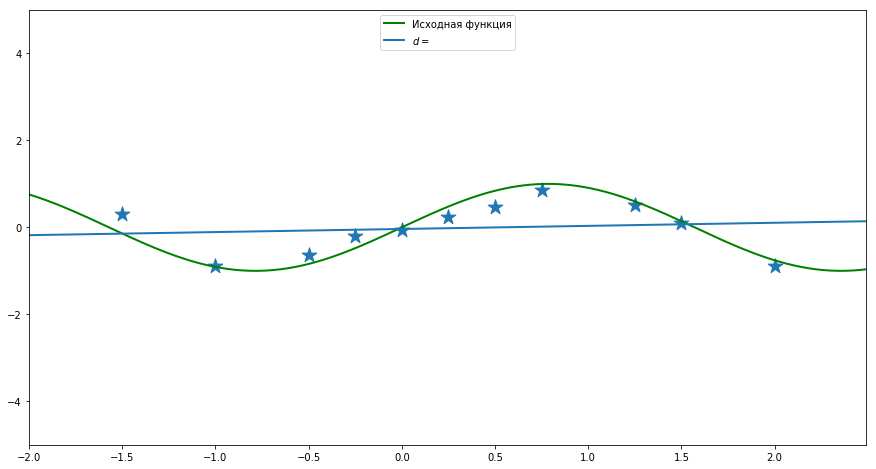

In [138]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(axes, data, marker='*', s=240)
ax.plot(xs, original_function(xs), linewidth=2, label="Исходная функция", color="green")
ax.plot(xs, model.predict( np.vstack(xs) ), linewidth=2, label="$d=%degree$")
ax.legend(loc="upper center")
plt.show()

Это было приближение полиномом первой степени.

Теперь попробуем приблизить полиномами бОльших степеней

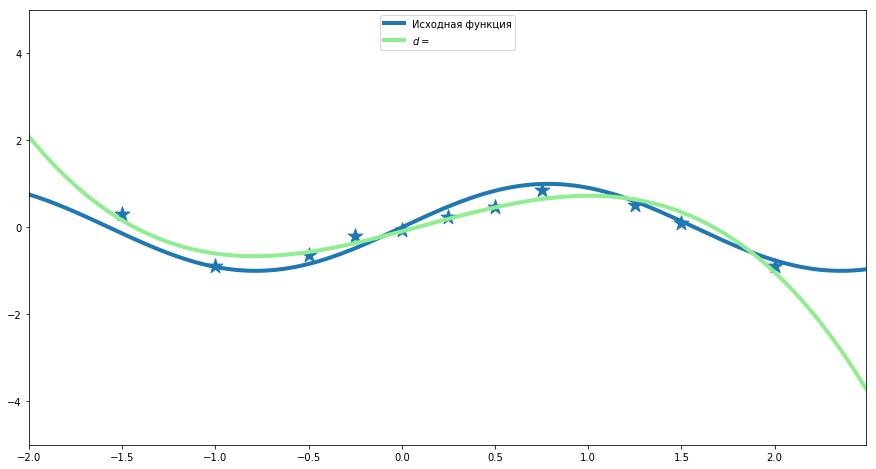

In [142]:
degree = 3

train = np.vstack([axes ** i for i in range(1, 12)]).transpose()
test = np.vstack([xs ** i for i in range(1, 12)]).transpose()

model = linear_model.LinearRegression()
model.fit(train[:, :degree], data)
model.coef_

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(axes, data, marker='*', s=240)
ax.plot(xs, original_function(xs), linewidth=4, label="Исходная функция")
ax.plot(xs, model.predict(test[:, :degree]), linewidth=4, label="$d=%degree$", color="lightgreen")
ax.legend(loc="upper center")
plt.show()

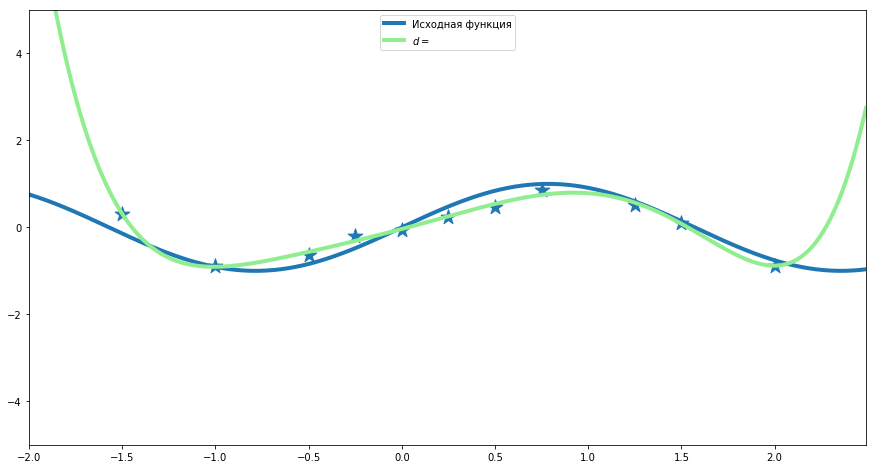

In [135]:
degree = 6

train = np.vstack([axes ** i for i in range(1, 12)]).transpose()
test = np.vstack([xs ** i for i in range(1, 12)]).transpose()

model = linear_model.LinearRegression().fit(train[:, :degree], data)
model.coef_

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(axes, data, marker='*', s=240)
ax.plot(xs, original_function(xs), linewidth=4, label="Исходная функция")
ax.plot(xs, model.predict(test[:, :degree]), linewidth=4, label="$d=%degree$", color="lightgreen")
ax.legend(loc="upper center")
plt.show()

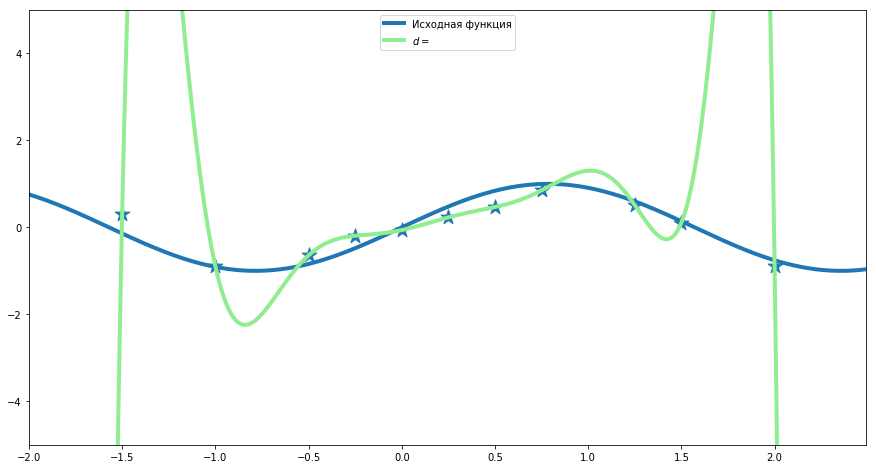

In [143]:
degree = 11

train = np.vstack([axes ** i for i in range(1, 12)]).transpose()
test = np.vstack([xs ** i for i in range(1, 12)]).transpose()

model = linear_model.LinearRegression()
model.fit(train[:, :degree], data)
model.coef_

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(axes, data, marker='*', s=240)
ax.plot(xs, original_function(xs), linewidth=4, label="Исходная функция")
ax.plot(xs, model.predict(test[:, :degree]), linewidth=4, label="$d=%degree$", color="lightgreen")
ax.legend(loc="upper center")
plt.show()

Налицо переобучение (сильная подгонка модели под данные)

Решение проблемы - регуляризация. 

Выделяют:
    - lasso-регрессию
    - ridge-регрессию (гребневая)
    
Их отличие состоит в форме добавочного члена, который "штрафует" модель за слишком сильную подгонку к функции


Lasso-регрессия решает задачу минимизации среднеквардатичной ошибки с L1-регуляризацией: $$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$$


Ridge-регрессия (или гребневая регрессия) решает задачу минимизации среднеквардатичной ошибки с L2-регуляризацией: $$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d w_i^2$$

где $y = w^Tx$ – уравнение гиперплоскости, зависящее от параметров модели $w$, $\ell$-число объектов в выборке $X$, $d$ – число признаков, $y$ – значения целевого признака, $\alpha$ – коэффициент регуляризации.

Не будем голословными. 

In [147]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

In [148]:
#работаем с набором данных по ценам на дома в Бостоне (репозиторий UCI).
boston = load_boston()
X, y = boston['data'], boston['target']

Признаки:

 - CRIM - количество преступлений на душу населения
 - ZN - процент жилых участков площадью больше 25 тыс. кв. футов 
 - INDUS - процент площадей под оптовую торговлю
 - CHAS - протекает ли река
 - NOX - концентрация оксидов азота
 - RM - среднее число комнат в здании
 - AGE - доля зданий, построенных до 1940 года
 - DIS - взвешенное расстояние до 5 деловых центров Бостона
 - RAD - индекс доступности скоростных магистралей
 - TAX - уровень налогов
 - PTRATIO - среднее число учащихся на одного преподавателя
 - B - процент афроамериканцев
 - LSTAT - процент граждан с низким уровнем жизни
 - MEDV (целевой) - медианная стоимости домов в районе

In [162]:
boundary = int(X.shape[0] * 0.7)

In [182]:
train_x, test_X = X[:boundary], X[boundary:]
train_y, test_y = y[:boundary], y[boundary:]

In [183]:
lasso = Lasso()
lasso.fit(train_x,train_y)
print(lasso.coef_)
model_y = lasso.predict(test_X)

[ 0.          0.02406413  0.          0.          0.          5.01451867
  0.         -0.52205082  0.         -0.01666887 -0.65613163  0.01296189
 -0.44757825]


In [186]:
error = np.sum((test_y - model_y)** 2)
print("Error: {0}".format(error))

Error: 10867.211348445973


А теперь поэкспериментируем с коэффициентом регуляризации альфа

In [154]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

(506, 13)

In [212]:
from sklearn.metrics import mean_absolute_error

n_alphas = 200
alphas = np.linspace(0.1, 100, n_alphas)
lasso_model = Lasso()

errors = []
for a in alphas:
    lasso_model.set_params(alpha=a)
    lasso_model.fit(train_x,train_y)
    model_y = lasso_model.predict(test_X)
    error = mean_absolute_error(test_y, model_y)
    errors.append(error)

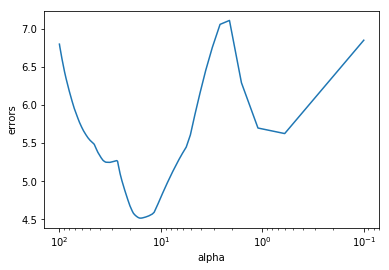

In [213]:
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  
plt.xlabel('alpha')
plt.ylabel('errors')
plt.show()